In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
from multiprocessing import Pool
from DataFormats.FWLite import Handle, Events

Welcome to JupyROOT 6.10/01


In [3]:
#LS50
events2016HL = "root://cms-xrd-global.cern.ch///store/data/Run2016H/JetHT/AOD/PromptReco-v2/000/283/408/00000/AE49FDAB-8398-E611-9B98-02163E014388.root"
#LS1000
events2016LL = "root://cms-xrd-global.cern.ch///store/data/Run2016H/JetHT/AOD/PromptReco-v2/000/283/408/00000/88FB6BA5-7B98-E611-B25E-FA163EE1CC08.root"

events2017B_HL = "root://cms-xrd-global.cern.ch///store/data/Run2017B/SingleMuon/AOD/PromptReco-v2/000/299/061/00000/5C4984B0-B86A-E711-837F-02163E01A792.root"
events2017B_LL = "root://cms-xrd-global.cern.ch///store/data/Run2017B/SingleMuon/AOD/PromptReco-v2/000/299/067/00000/B4146406-F66A-E711-B9C9-02163E014389.root"

label = "generalTracks"
quality = "highPurity"

In [20]:
def nt(fevents) :
    print fevents
    events = Events(fevents)
    tracks = Handle("std::vector<reco::Track>")
    nt = []
    for i in range(0,1000) : # events.size()):
      a= events.to(i)
      if (i%500==0) : print "Event", i 
      a=events.getByLabel(label, tracks)
      nt.append(tracks.product().size())
    print len(nt)
    id = events.object().id()
    runid = '{:d}:{:d}'.format(int(id.run()),int(id.luminosityBlock()))
    return (runid,nt)

In [21]:
p = Pool(4)
nts = p.map(nt, [events2016HL,events2016LL,events2017B_HL,events2017B_LL])
for n in nts : print n[0],len(n[1])

root://cms-xrd-global.cern.ch///store/data/Run2016H/JetHT/AOD/PromptReco-v2/000/283/408/00000/AE49FDAB-8398-E611-9B98-02163E014388.root
root://cms-xrd-global.cern.ch///store/data/Run2017B/SingleMuon/AOD/PromptReco-v2/000/299/061/00000/5C4984B0-B86A-E711-837F-02163E01A792.root
root://cms-xrd-global.cern.ch///store/data/Run2016H/JetHT/AOD/PromptReco-v2/000/283/408/00000/88FB6BA5-7B98-E611-B25E-FA163EE1CC08.root
root://cms-xrd-global.cern.ch///store/data/Run2017B/SingleMuon/AOD/PromptReco-v2/000/299/067/00000/B4146406-F66A-E711-B9C9-02163E014389.root
Event 0
Event 0
Event 0
Event 500
Event 0
1000
Event 500
1000
Event 500
1000
Event 500
1000
283408:50 1000
283408:999 1000
299061:71 1000
299067:23 1000


In [22]:
def plotNT(nt):
    y,x = np.histogram(nt,np.linspace(0.,3000.,300))
    x.resize(len(y))
    return (y,x)

4
4 299


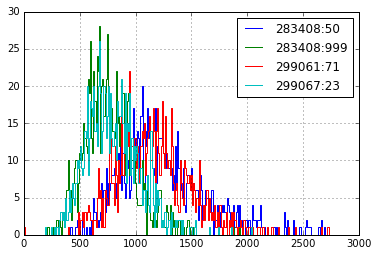

In [24]:
print len(nts)
#(y, x) = zip(*p.map(plotNT,nts))
xy = []
for nt in nts : xy.append(plotNT(nt[1]))
(y, x) = zip(*xy)
print len(x),len(y[0])
for i in range(0,len(y)) :
    plt.step(x[0],y[i],where='post',label=nts[i][0])
plt.grid(True)
plt.legend(loc='upper right')
plt.show()